<a href="https://colab.research.google.com/github/Raivotar/Projetos_de_Negocio/blob/main/Colab/Projeto_de_Negocio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo o Problema:
- Gerente do banco está preocupado com a evasão de clientes que usam cartão de crédito e gostaria de uma relação dos clientes mais propensos a evadir para fazer uma abordagem preventiva visando reter esses clientes.

#Exploração dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import ranksums
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Raivotar/Projetos_de_Negocio/main/Dados/BankChurners.csv")

In [3]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Na documentação do banco de dados é informado para desconsiderar as duas colunas que estamos excluindo.

In [4]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          axis=1, inplace=True)

Não há valores nulos

In [5]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Visão geral dos dados

In [6]:
data.set_index("CLIENTNUM", inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Definição do target
A variavel "Attrition_Flag" é nosso target, onde verificamos 8500 clientes ativos e 1627 que evadiram, portanto nosso trabalho visa encontrar desses 8500 clientes, quais estão propensos a evadir.
A principio vamos tratar esse problema como Classificação de uma variavel binária

In [7]:
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [8]:
data.shape

(10127, 20)

In [9]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
rename = {
    'Existing Customer': 'True',
    'Attrited Customer': 'False'
}
data["Attrition_Flag"] = data["Attrition_Flag"].map(rename)

## Visualização para gerar insights 
- Selecionamos 4 variáveis para analise, onde iremos realizar visualizações e testes de hipoteses.

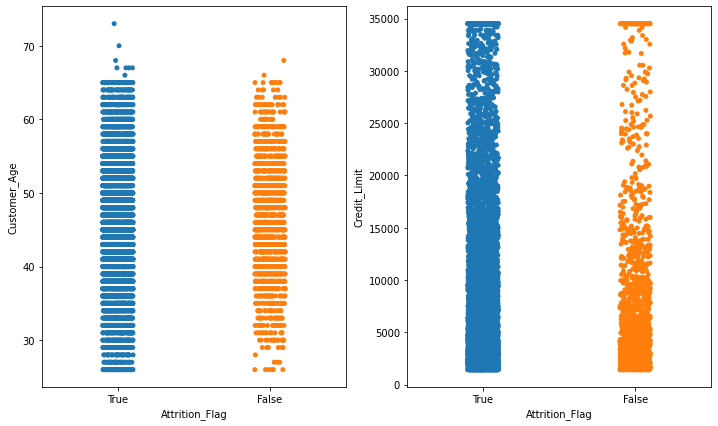

In [11]:
fig, ax =plt.subplots(1,2, figsize=(12, 7))
sns.stripplot(x='Attrition_Flag', y='Customer_Age', data=data, ax=ax[0])
sns.stripplot(x='Attrition_Flag', y='Credit_Limit', data=data, ax=ax[1])
fig.show()

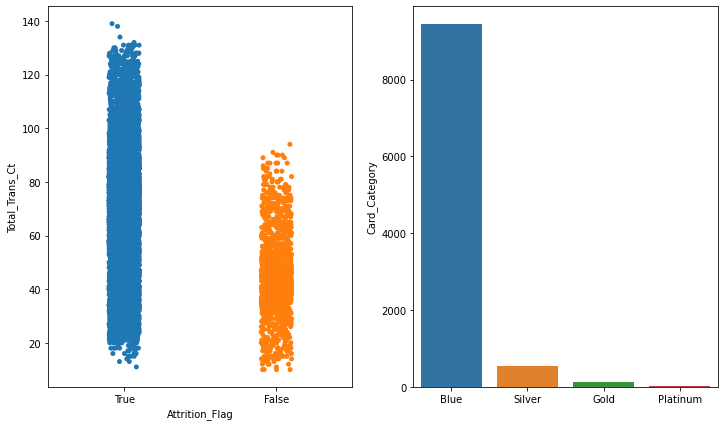

In [12]:
fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.stripplot(x='Attrition_Flag', y='Total_Trans_Ct', data=data, ax=ax[0])
sns.barplot(x=data['Card_Category'].value_counts().index, y=data['Card_Category'].value_counts(), ax=ax[1])

fig.show()

### Idade dos clientes

Visualmente a maior parte dos clientes que evadiram tem idade entre 30 a 60 anos, enquanto que tem termos de valor de limite a maior parte dos evadidos tinham limite entre 1000 a 15 mil. 

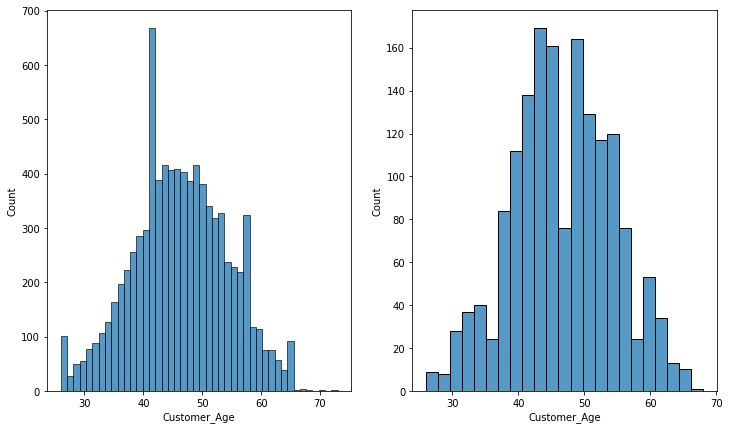

In [13]:
true_age = data.query("Attrition_Flag == 'True'")['Customer_Age']
false_age = data.query("Attrition_Flag == 'False'")["Customer_Age"]
fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.histplot(true_age, ax=ax[0])
sns.histplot(false_age, ax=ax[1])
fig.show()

- Teste de hipotese
>H<sup>0</sup>
A distribuição de idade para os clientes que permanecem no banco e para os clientes que evadiram são iguais.

- Teste de hipotese
>H<sup>1</sup>
A distribuição de idade para os clientes que permanecem no banco e para os clientes que evadiram NÃO são iguais.

In [14]:
r =ranksums(true_age, false_age)
print(f"O valor de p-value é {r.pvalue}")

O valor de p-value é 0.07830659072580051


- Visto que p-value > 0.05 então descartamos a hipotese H<sup>1</sup>. As distribuições são iguais.

### Valor do limite

In [15]:
true_credit = data.query("Attrition_Flag == 'True'")['Credit_Limit']
false_credit = data.query("Attrition_Flag == 'False'")["Credit_Limit"]

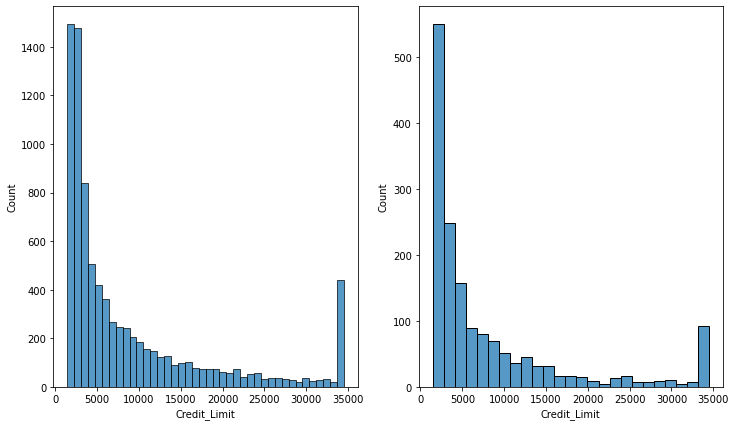

In [16]:
fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.histplot(true_credit, ax=ax[0])
sns.histplot(false_credit, ax=ax[1])
fig.show()

- Teste de hipotese
> H<sup>0</sup>
A distribuiçãos de limite de crédito para os clientes que permanecem no banco e para os clientes que evadiram são iguais

- Teste de hipotese
>H<sup>1</sup>
A distribuição de limite de crédito para os clientes que permanecem no banco e para os clientes que evadiram NÃO são iguais

In [17]:
r =ranksums(true_credit, false_credit)
print(f"O valor de p-value é {r.pvalue}")

O valor de p-value é 3.018075374341616e-07


- Visto que p-value < 0.05 então descartamos a hipotese H<sup>0</sup>. As distribuições não são iguais.

### Tipo de cartão

In [18]:
true_type = data.query("Attrition_Flag == 'True'")['Card_Category']
false_type = data.query("Attrition_Flag == 'False'")["Card_Category"]

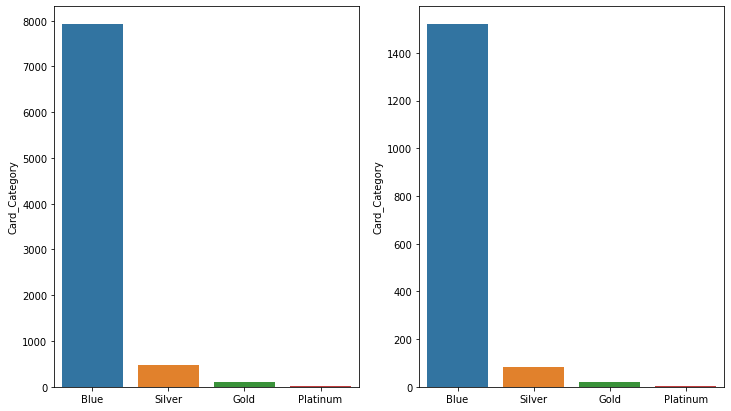

In [19]:
fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.barplot(x=data['Card_Category'].value_counts().index, y=true_type.value_counts(), ax=ax[0])
sns.barplot(x=data['Card_Category'].value_counts().index, y=false_type.value_counts(), ax=ax[1])
fig.show()

- Teste de hipotese
> H<sup>0</sup>
A distribuição do tipo de cartão para os clientes que permanecem no banco e para os clientes que evadiram são iguais

- Teste de hipotese
> H<sup>1</sup>
A distribuição do tipo de cartão para os clientes que permanecem no banco e para os clientes que evadiram Não são iguais

In [20]:
r =ranksums(true_type, false_type)
print(f"O valor de p-value é {r.pvalue}")

O valor de p-value é 0.8762106624776538


- Visto que p-value > 0.05 então descartamos a hipotese H<sup>1</sup>. As distribuições são iguais.

###  Contagem total de transações realizadas

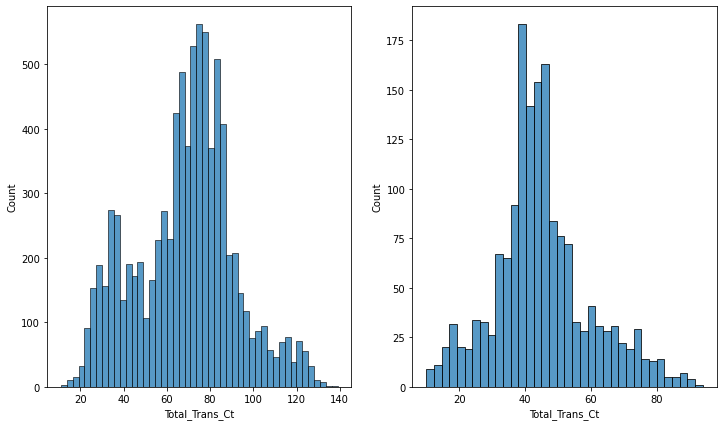

In [21]:
true_trans = data.query("Attrition_Flag == 'True'")['Total_Trans_Ct']
false_trans = data.query("Attrition_Flag == 'False'")["Total_Trans_Ct"]

fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.histplot(true_trans, ax=ax[0])
sns.histplot(false_trans, ax=ax[1])
fig.show()

- Teste de hipotese
> H<sup>0</sup>
A distribuição do total de transações para os clientes que permanecem no banco e para os clientes que evadiram são iguais

- Teste de hipotese
> H<sup>1</sup>
A distribuição do total de transações para os clientes que permanecem no banco e para os clientes que evadiram Não são iguais

In [22]:
r =ranksums(true_trans, false_trans)
print(f"O valor de p-value é {r.pvalue}")

O valor de p-value é 0.0


- Visto que p-value < 0.05 então descartamos a hipotese H<sup>0</sup>. As distribuições NÃO são iguais.

### Conclusão 
- Das quatro variáveis selecionadas para analise, duas apresentaram distribuição igual para os clientes que permanecem no banco e os clientes que evadiram e duas apresentaram distribuição diferentes.
- As variáveis que apresentaram distribuição diferentes destacam um padrão comportamental diferente dos clientes que permanecem no banco, gerando uma otima oportunidade para usar esse padrão para estimar clientes propensos a evadir. Essas variáveis são "Total_Trans_Ct" e "Credit_Limit".

## Tratamento dos dados


### Normalização sem uso de bibliotecas

Observamos que a faixa do valor de limite é de 1438 a 34516, com média de 8631 e desvio padrão de 9088. a faixa da quantidade de transações é de 10 a 139, com média de 64 e desvio padrão de 23. Como a escala dos valores é muito diferente, para melhorar a qualidade dos dados é necessario normalizar esses valores.
Inicialmente iremos realizar a normalização com métodos manuais, sem uso de bibliotecas que realizam essa atividade.

In [23]:
data['Credit_Limit'].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [24]:
data['Total_Trans_Ct'].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

#### Valor do limite
$$X_n = (X_n - mean) / std $$

In [25]:
data['Credit_Limit_Manual_Norm'] = (data['Credit_Limit'] - data['Credit_Limit'].mean())/data['Credit_Limit'].std()
data['Credit_Limit_Manual_Norm'].describe()

count    1.012700e+04
mean     1.089401e-14
std      1.000000e+00
min     -7.914876e-01
25%     -6.686217e-01
50%     -4.492303e-01
75%      2.679730e-01
max      2.847913e+00
Name: Credit_Limit_Manual_Norm, dtype: float64

No gráfico temos a plotagem do histograma da variável "Credit_Limit" antes e depois da normalização, onde podemos observar que a Normalização não afeta a distribuição, mudando apenas o alcance da variável que antes era de 0 a 35000 e agora ficou de -3 a 3.

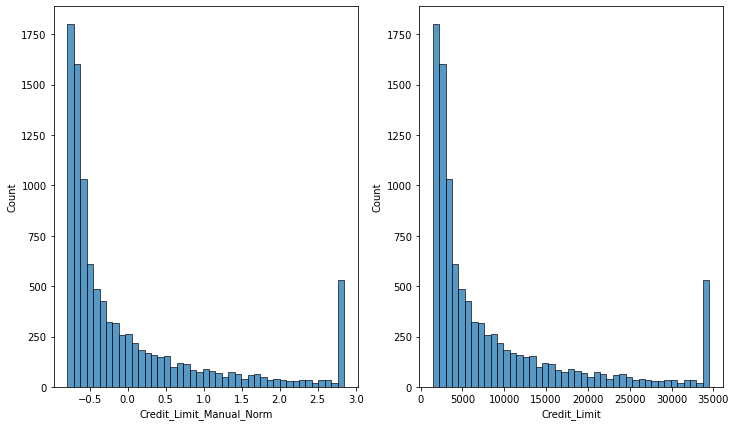

In [26]:
fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.histplot(data["Credit_Limit"], ax=ax[1])
sns.histplot(data["Credit_Limit_Manual_Norm"], ax=ax[0])

fig.show()

#### Contagem de transações
$$X_n = (X_n - mean) / std $$

In [27]:
data['Total_Trans_Ct_Manual_Norm'] = (data['Total_Trans_Ct'] - data['Total_Trans_Ct'].mean())/data['Total_Trans_Ct'].std()
data['Total_Trans_Ct_Manual_Norm'].describe()

count    1.012700e+04
mean    -4.666785e-15
std      1.000000e+00
min     -2.337140e+00
25%     -8.460383e-01
50%      9.122586e-02
75%      6.876667e-01
max      3.158636e+00
Name: Total_Trans_Ct_Manual_Norm, dtype: float64

Semelhante ao que vimos na variável "Credit_Limit", a Normalização da variável "Total_Trans_Ct", altera apenas o alcance não alterando a distribuição. 

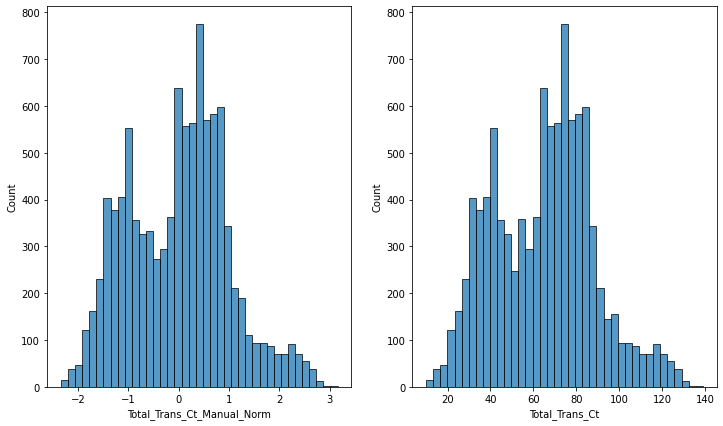

In [28]:
fig, ax =plt.subplots(1,2, figsize=(12, 7))

sns.histplot(data["Total_Trans_Ct"], ax=ax[1])
sns.histplot(data["Total_Trans_Ct_Manual_Norm"], ax=ax[0])

fig.show()

### Normalização usando Normalizer do sklearn.preprocessing

In [29]:
from sklearn.preprocessing import Normalizer

X = data[["Total_Trans_Ct", "Credit_Limit"]]

scaler = Normalizer().fit(X)
normalized_X = scaler.transform(X)
df_norm = pd.DataFrame(normalized_X)
df_norm.rename(columns={0: 'Total_Trans_Ct', 1: 'Credit_Limit'}, inplace=True)
df_norm.describe()

,Total_Trans_Ct,Credit_Limit
count,10127.000000,10127.000000
mean,0.016766,0.999762
std,0.013925,0.000352
min,0.000348,0.997780
25%,0.005261,0.999669
50%,0.012459,0.999922
75%,0.025738,0.999986
max,0.066597,1.000000


## Dividindo os dados em treino e teste

- Vamos prosseguir a analise utilizando os dados normalizados manualmente
- Tendo em vista o problema de negócio, optamos por selecinar uma base de teste de 20% do banco de dados e validação com 80%. A ideia é identificar clientes com comportamento daqueles que evadiram, portando não buscamos uma alta eficácia do modelo e sim identificar clientes com padrões de evasão. Ou seja os clientes que forem selecionados pelo modelo porem permanecem no banco, devem ser abordados preventivamente para evitar a evasão.

In [30]:
from sklearn.model_selection import train_test_split

rename = {
    'True': 1,
    'False': 0,
}
data["Attrition_Flag"] = data["Attrition_Flag"].map(rename)
y = data['Attrition_Flag']
X_norm = data[["Total_Trans_Ct_Manual_Norm", "Credit_Limit_Manual_Norm"]]

X_train, X_val, y_train, y_val = train_test_split(X_norm, y, random_state=0, stratify=y, train_size=0.20)

# Modelagem

## Implementação manual de Regressão Logística

In [31]:
class RegressaoLogistica:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    # Iniciando os parametros
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    # Gradient Descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

## Predições usando a implementação manual da Regressão Logística

In [32]:
rl = RegressaoLogistica()
rl.fit(X_train, y_train)
predicoes = rl.predict(X_val)

def accuracy(y_val, y_pred):
  accuracy = np.sum(y_val == y_pred)/ len(y_val)
  return accuracy

acc_manual = accuracy(y_val, predicoes)
print(f"Acurácia: {acc_manual:.2%}")

Acurácia: 83.93%


## Predições usando Regressão Logística da biblioteca Sklearn

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_train, y_train)
predicoes_sklearn = lr.predict(X_val)

acc_sklearn = accuracy(y_val, predicoes_sklearn)
print(f"Acurácia: {acc_sklearn:.2%}")

Acurácia: 83.68%


## Conclusão 
- Encontramos acurácias muito próximas para os dois modelos, porem a implantação manual apresentou uma acurácia ligeiramente melhor.

# Conclusão final

In [34]:
data['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [35]:
from collections import Counter

Counter(predicoes_sklearn)

Counter({0: 210, 1: 7892})

Inicialmente tinhamos 10127 clientes dos quais 1627 evadiram e 8500 permaneceram. De acordo com nosso modelo de regressão logística há 210 clientes com mesmo perfil que os clientes que evadiram, portanto esses clientes devem ser abordados preventivamente para garantir a retenção.

In [36]:
pred = pd.DataFrame(predicoes_sklearn)
pred.set_index(X_val.index, inplace=True)

In [37]:
pred = pred.rename(columns = {0: 'Pred'}, inplace = False)


In [38]:
client_id_list = pred.query('Pred == 0').index.values
client_id_list_df = pd.DataFrame(client_id_list)

## Geramos um arquivo excel com a relação de ID dos clientes que devem ser abordados para evitar evasão.

In [39]:
client_id_list_df.to_excel("client_id_list.xlsx")